# Taking a look at the DECAY0 files

In [16]:
import pandas as pd
import numpy as np
import numba
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import matplotlib

In [17]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
matplotlib.rcParams['axes.linewidth'] = 0.75 #set the value globally
matplotlib.rcParams['xtick.major.width'] = 0.75
matplotlib.rcParams['ytick.major.width'] = 0.75
matplotlib.rcParams['axes.labelsize'] = 7
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['xtick.labelsize'] = 6
matplotlib.rcParams['ytick.labelsize'] = 6
matplotlib.rcParams['legend.fontsize'] =5
matplotlib.rcParams['pdf.fonttype']=42


matplotlib.rcParams['figure.figsize'] = (3.4908516673585166, 2.327234444905678)
matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rc('font', size= 7)
params= {'text.latex.preamble' : [r'\usepackage{amsmath}']}
plt.rcParams.update(params)

## 1. Open file and load content into dataframe

In [2]:
#f = open('test_all_states.dat', "r")
#f = open('test_all_branches_20192308.dat','r')
f = open('../macros/events/0nukk_1e5_events.dat','r')
lines = f.readlines()
f.close()

In [3]:
splitted=[line.split() for line in lines[22:]] # Start at 22nd entry after all text lines in the file
index=0
event=[]
px=[]
py=[]
pz=[]
t=[]
n=[]
ptype=[]
for chunk in splitted:
    
    
    if len(chunk)==5:
        event.append(index)
        n.append(nentries)
        ptype.append(int(chunk[0]))
        px.append(float(chunk[1]))
        py.append(float(chunk[2]))
        pz.append(float(chunk[3]))
        t.append(float(chunk[4]))
    elif len(chunk)==3:
        nentries=int(chunk[2])
        #print(nentries)
        index+=1
        
df=pd.DataFrame()
df['event']=np.asarray(event)
df['n']=np.asarray(n)
df['px']=np.asarray(px)
df['py']=np.asarray(py)
df['pz']=np.asarray(pz)
df['t']=np.asarray(t)
df['ptype']=np.asarray(ptype)
df['ptot']=np.sqrt(np.power(df.px,2)+np.power(df.py,2)+np.power(df.pz,2))
df.head()

,event,n,px,py,pz,t,ptype,ptot
0,1,5,-0.006142,0.016628,0.026840,0.000000e+00,1,0.032165
1,1,5,-0.016250,-0.027643,0.002525,0.000000e+00,1,0.032165
2,1,5,0.946642,0.508665,0.995167,0.000000e+00,1,1.464660
3,1,5,0.167859,0.587333,-0.386363,3.673480e-13,1,0.722781
4,1,5,-0.575412,0.054495,-0.170913,4.514200e-12,1,0.602727


### Check branching ratios

In [4]:
# Should be 27.3 %
print(len(np.unique(df[np.all([df.ptot>=2.18], axis=0)].event))/1000)

# Should be 3.8 % and 2.2 %
print(len(np.unique(df[np.all([df.ptot>=0.72, df.ptot<=0.73], axis=0)].event))/1000)
print(len(np.unique(df[np.all([df.ptot>=1.32, df.ptot<=1.33], axis=0)].event))/1000)

# Should be 57.4% and 9.3 %
print(len(np.unique(df[np.all([df.ptot>=1.436, df.ptot<=1.437], axis=0)].event))/1000)
print(len(np.unique(df[np.all([df.ptot>=2.0, df.ptot<=2.1], axis=0)].event))/1000)

27.436
57.029
9.387
3.726
2.221


## 2. What about events with more than 5 entries?

Those are events with a conversion electron (ptype = 3). These do not yet have the correct angular correlation. However, they make up less than 1 % of all events in a sample of 10000 events. So it might be overkill to also include the correct $\gamma$-$e^-$ correlation.

In [5]:
df_sub=df[df.n>=6]
print('Number of events containing a conversion electron:', len(np.unique(df_sub.event)))
print('Fraction of events containing a conversion electron:', len(np.unique(df_sub.event))/len(np.unique(df.event))*100,'%')

df_sub.head(30)


Number of events containing a conversion electron: 510
Fraction of events containing a conversion electron: 0.51 %


,event,n,px,py,pz,t,ptype,ptot
1508,328,6,0.026698,0.008610,-0.015737,0.000000e+00,1,0.032165
1509,328,6,0.031710,-0.000422,0.005374,0.000000e+00,1,0.032165
1510,328,6,-0.427764,-1.344890,-0.391801,0.000000e+00,1,1.464657
1511,328,6,-0.651363,-0.641742,-0.589518,4.520900e-13,3,1.087951
1512,328,6,0.011672,-0.026046,-0.014022,0.000000e+00,1,0.031800
1513,328,6,0.602309,-0.016543,0.015178,4.095650e-12,1,0.602727
1575,342,6,0.017806,0.025069,0.009438,0.000000e+00,1,0.032165
1576,342,6,0.006367,0.008594,0.030335,0.000000e+00,1,0.032165
1577,342,6,0.162634,-0.903946,-1.140900,0.000000e+00,1,1.464657
1578,342,6,-0.320079,0.519106,-0.387934,5.402740e-13,1,0.722782


## 3. Check out angular correlations

In [6]:
def vangle(v1,v2):
    'Returns cos(theta) of the angle theta between two vectors.'
    enumerator=np.sum(np.multiply(v1,v2))
    denominator=np.multiply(np.sqrt(np.sum(np.power(v1,2))),np.sqrt(np.sum(np.power(v2,2))))
    costheta=enumerator/denominator
    return costheta

def wtheta(a2,a4,costheta):
    return np.add(1+(a2/2)*(3*np.power(costheta,2)-1),(a4/8)*(35*np.power(costheta,4)-30*np.power(costheta,2)+3))

In [7]:
print(vangle((1,0,0),(1,0,0)))
print(vangle((0,1,0),(1,0,0)))

1.0
0.0


### 3.1 Transitions with two $\gamma$-rays (0+ $\rightarrow$ 2+ $\rightarrow$ 0+)

In [8]:
df020=df[df.n==4]
df020.head()

,event,n,px,py,pz,t,ptype,ptot
5,2,4,0.017686,0.015753,0.021763,0.000000e+00,1,0.032165
6,2,4,-0.017208,0.021115,-0.017106,0.000000e+00,1,0.032165
7,2,4,1.999220,-0.022687,0.888781,0.000000e+00,1,2.187996
8,2,4,-0.561456,-0.105458,0.192162,1.422340e-11,1,0.602728
24,6,4,-0.002000,-0.028280,-0.015194,0.000000e+00,1,0.032165


In [9]:
#df020 = df020.groupby('event')
#df_test=df020.agg({'px': lambda x: x.iloc[-2]})
#df_test

In [11]:
#@numba.jit
def iterate_df_angles(dataframe,ngammas,igamma1,igamma2,egreater=0,esmaller=np.inf):
    # Cut dataframe
    data=dataframe[dataframe.n==int(ngammas+2)]
    angles=[]
    for i in tqdm_notebook(data.event):
        dftemp=data[data.event==i]
        #Get momentum of first gamma (second to last entry for 2 gammas)
        p1=(dftemp.iloc[-int(ngammas-igamma1+1)]['px'], dftemp.iloc[-int(ngammas-igamma1+1)]['py'], dftemp.iloc[-int(ngammas-igamma1+1)]['pz'])
        #Get momentum of first gamma (Last entry for 2 gammas)
        p2=(dftemp.iloc[-int(ngammas-igamma2+1)]['px'], dftemp.iloc[-int(ngammas-igamma2+1)]['py'], dftemp.iloc[-int(ngammas-igamma2+1)]['pz'])
        # Check if energy of first gamma is correct and append angle between momentum vectors to dataframe
        if dftemp.iloc[-int(ngammas-igamma1+1)]['ptot']>egreater and dftemp.iloc[-int(ngammas-igamma1+1)]['ptot']<esmaller:
            angles.append(vangle(p1,p2))
    return angles

angles=iterate_df_angles(dataframe=df020,ngammas=2,igamma1=1,igamma2=2,egreater=0,esmaller=np.inf)


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


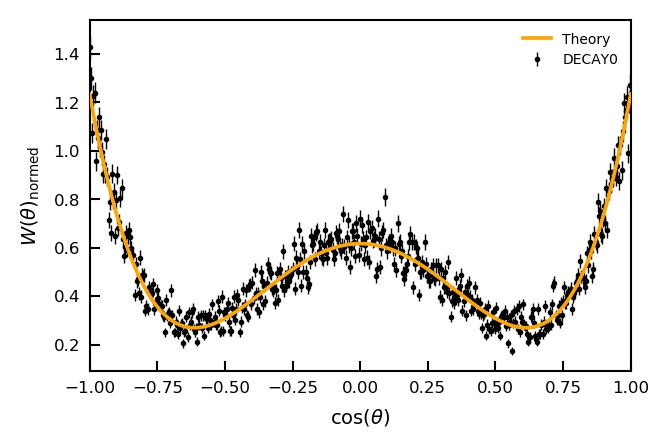

In [198]:
#Correlation formula normalization
stepsize=0.0001
costet=np.arange(-1,1.01,stepsize)
w=wtheta(0.3571,1.1429,costet)
areaw=np.sum(w*stepsize)

#Histogram normalization
nbins=500
binwidth=2/nbins
counts, edges = np.histogram(angles,bins=nbins,range=(-1,1))
centers=edges[:-1]+binwidth/2
norm=np.sum(counts)*binwidth
normed_counts=np.divide(counts,norm)
normed_counts_err=np.divide(np.sqrt(counts),norm)

plt.errorbar(centers,normed_counts,normed_counts_err, color='black', marker='o', linestyle='', 
             ms=1, elinewidth=0.5, label='DECAY0')
plt.plot(costet,w/areaw, linestyle='-', marker='', linewidth=1.33, color='orange', label='Theory', zorder=4)


plt.xlabel('cos($\\theta$)')
plt.ylabel('$W(\\theta)_{\\rm{normed}}$')
leg=plt.legend()
leg.get_frame().set_linewidth(0)
plt.xlim(-1,1)
plt.draw()
plt.show()

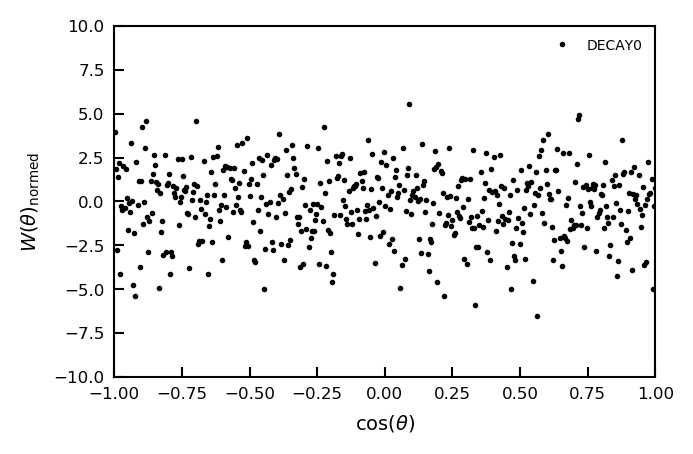

In [201]:
#Correlation formula normalization
stepsize=0.0001
costet=np.arange(-1,1.01,stepsize)
w=wtheta(0.3571,1.1429,costet)
areaw=np.sum(w*stepsize)

#Histogram normalization
nbins=500
binwidth=2/nbins
counts, edges = np.histogram(angles,bins=nbins,range=(-1,1))
centers=edges[:-1]+binwidth/2
norm=np.sum(counts)*binwidth
normed_counts=np.divide(counts,norm)
normed_counts_err=np.divide(np.sqrt(counts),norm)


w2=wtheta(0.3571,1.1429,centers)
areaw2=np.sum(w2*binwidth)




plt.plot(centers,(normed_counts-w2/areaw2)/(normed_counts_err), color='black', marker='o', linestyle='', 
             ms=1, label='DECAY0')

plt.xlabel('cos($\\theta$)')
plt.ylabel('$W(\\theta)_{\\rm{normed}}$')
leg=plt.legend()
leg.get_frame().set_linewidth(0)
plt.xlim(-1,1)
plt.ylim(-10,10)
plt.draw()
plt.show()

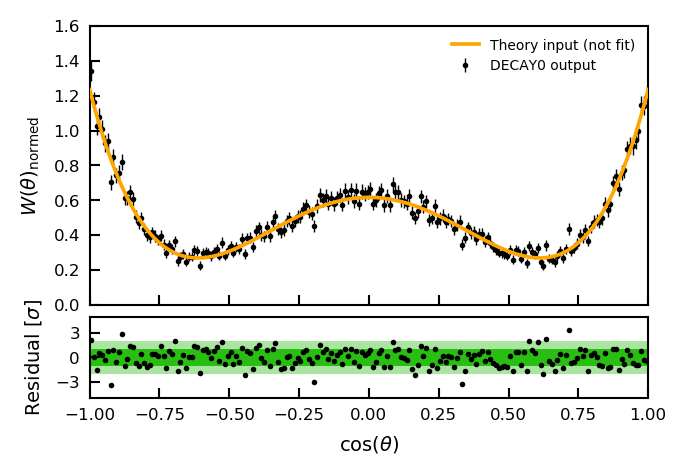

In [226]:
stepsize=0.0001
costet=np.arange(-1,1.01,stepsize)
w=wtheta(0.3571,1.1429,costet)
areaw=np.sum(w*stepsize)

#Histogram normalization
nbins=200
binwidth=2/nbins
counts, edges = np.histogram(angles,bins=nbins,range=(-1,1))
centers=edges[:-1]+binwidth/2
norm=np.sum(counts)*binwidth
normed_counts=np.divide(counts,norm)
normed_counts_err=np.divide(np.sqrt(counts),norm/2)



fig1 = plt.figure(1)

frame1=fig1.add_axes((.1,.3,.8,.6))
frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
frame1.set_ylabel('$W(\\theta)_{\\rm{normed}}$')
frame1.set_ylim(0,1.6)
frame1.set_xlim(-1,1)

frame1.errorbar(centers,normed_counts,normed_counts_err, color='black', marker='o', linestyle='', 
             ms=1, elinewidth=0.5, label='DECAY0 output')
frame1.plot(costet,w/areaw, linestyle='-', marker='', linewidth=1.33, color='orange', label='Theory input (not fit)', zorder=4)

leg=plt.legend(ncol=1, frameon=True, bbox_to_anchor=[1, 1], loc='upper right')
leg.get_frame().set_linewidth(0.0)

# Residual plot
frame2=fig1.add_axes((.1,.1,.8,.175)) 
#plt.grid()
frame2.set_ylabel('Residual [$\\sigma$]')
frame2.set_xlabel('cos($\\theta$)')
frame2.set_yticks([-3,0,3])
frame2.set_xlim(-1,1)
frame2.set_ylim(-5,5)

w2=wtheta(0.3571,1.1429,centers)
areaw2=np.sum(w2*binwidth)
residual = (normed_counts-w2/areaw2)/(normed_counts_err)
frame2.plot(centers, residual, color='black', marker='o', linestyle='', 
             ms=1, label='DECAY0')

plt.axhspan(-2,2,facecolor='#29BF12', alpha=0.4, label='$2\\sigma$',edgecolor='none')
plt.axhspan(-1,1, facecolor='#29BF12', alpha=1, label='$1\\sigma$', edgecolor='none')

plt.draw()
plt.savefig('angular_020_correlation.pdf', transparent=True, bbox_inches='tight')
plt.show()

-0.038798896648056136
1.0884676519608516


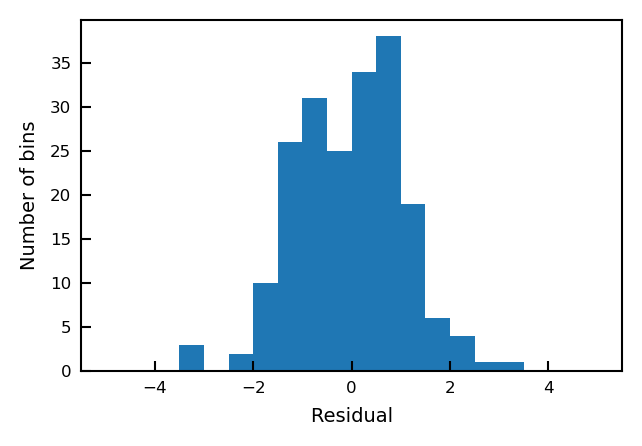

In [236]:
plt.hist(residual, range=(-5,5), bins=20)
print(np.mean(residual))
print(np.std(residual))
plt.xlabel('Residual')
plt.ylabel('Number of bins')
plt.show()

### 3.2 Transitions with three $\gamma$-rays (0+ $\rightarrow$ 2+ $\rightarrow$ 2+ $\rightarrow$ 0+)

#### 3.2.1 The 0+ $\rightarrow$ 2+ $\rightarrow$ 2+ transition with $E_1 = 1465$ keV, $E_2 = 723$ keV  and $\delta_{2+\rightarrow2+} = -3.4$

In [227]:
df0220=df[df.n==5]
df0220.head(10)

,event,n,px,py,pz,t,ptype,ptot
0,1,5,-0.006142,0.016628,0.026840,0.000000e+00,1,0.032165
1,1,5,-0.016250,-0.027643,0.002525,0.000000e+00,1,0.032165
2,1,5,0.946642,0.508665,0.995167,0.000000e+00,1,1.464660
3,1,5,0.167859,0.587333,-0.386363,3.673480e-13,1,0.722781
4,1,5,-0.575412,0.054495,-0.170913,4.514200e-12,1,0.602727
9,3,5,0.027525,0.006809,-0.015185,0.000000e+00,1,0.032165
10,3,5,0.025516,0.010538,-0.016506,0.000000e+00,1,0.032165
11,3,5,-0.073952,-1.446350,0.218730,0.000000e+00,1,1.464664
12,3,5,0.396968,0.108559,-0.594176,1.348480e-12,1,0.722782
13,3,5,-0.470161,-0.197970,-0.320993,1.448980e-11,1,0.602727


In [228]:
angles21=iterate_df_angles(dataframe=df0220,ngammas=3,igamma1=1,igamma2=2,egreater=1.464,esmaller=np.inf)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


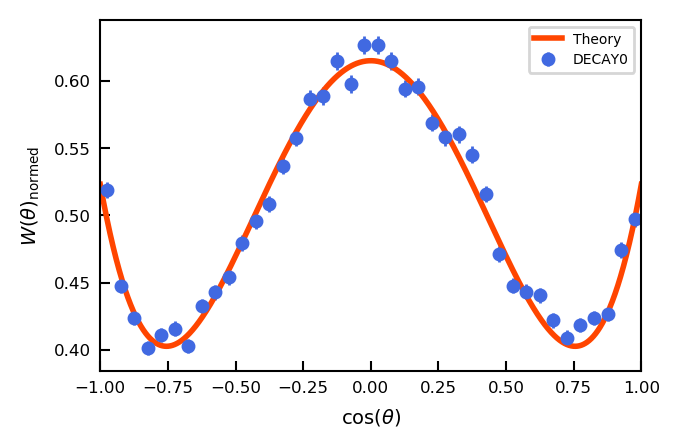

In [229]:
#Function normalization
stepsize=0.001
costet=np.arange(-1,1.01,stepsize)
w=wtheta(-0.2487,0.3005,costet)
areaw=np.sum(w*stepsize)

#Histogram normalization
nbins=40
binwidth=2/nbins
counts, edges = np.histogram(angles21,bins=nbins,range=(-1,1))
centers=edges[:-1]+binwidth/2
norm=np.sum(np.multiply(counts,binwidth))
normed_counts=np.divide(counts,norm)
normed_counts_err=np.divide(np.sqrt(counts),norm)

plt.errorbar(centers,normed_counts,normed_counts_err, color='royalblue', marker='o', linestyle='', 
             ms=4, elinewidth=1, label='DECAY0')
plt.plot(costet,w/areaw, linestyle='-', marker='', linewidth=2, color='orangered', label='Theory')
plt.xlabel('cos($\\theta$)')
plt.ylabel('$W(\\theta)_{\\rm{normed}}$')
plt.xlim(-1,1)
plt.legend()
plt.show()

#### 3.2.2 The 2+ $\rightarrow$ 2+ $\rightarrow$ 0+ transition with $E_2 = 723$ keV, $E_3 = 603$ keV  and $\delta_{2+\rightarrow2+} = -3.4$

In [230]:
angles22=iterate_df_angles(dataframe=df0220,ngammas=3,igamma1=2,igamma2=3,egreater=0,esmaller=0.724)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


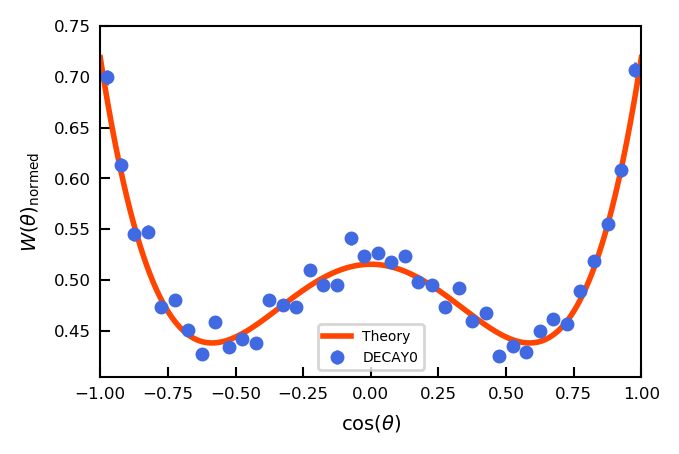

In [231]:
#Function normalization
stepsize=0.001
costet=np.arange(-1,1.01,stepsize)
w=wtheta(0.1476,0.3005,costet)
areaw=np.sum(w*stepsize)

#Histogram normalization
nbins=40
binwidth=2/nbins
counts, edges = np.histogram(angles22,bins=nbins,range=(-1,1))
centers=edges[:-1]+binwidth/2
norm=np.sum(np.multiply(counts,binwidth))
normed_counts=np.divide(counts,norm)
normed_counts_err=np.divide(np.sqrt(counts),norm)

plt.errorbar(centers,normed_counts,normed_counts_err, color='royalblue', marker='o', linestyle='', 
             ms=4, elinewidth=1, label='DECAY0')
plt.plot(costet,w/areaw, linestyle='-', marker='', linewidth=2, color='orangered', label='Theory')
plt.xlabel('cos($\\theta$)')
plt.ylabel('$W(\\theta)_{\\rm{normed}}$')
plt.xlim(-1,1)
plt.legend()
plt.show()

#### 3.2.3 The 0+ $\rightarrow$ 2+ $\rightarrow$ 2+ transition with $E_1 = 752$ keV, $E_2 = 1437$ keV  and $\delta = 0.13$

In [232]:
angles23=iterate_df_angles(dataframe=df0220,ngammas=3,igamma1=1,igamma2=2,egreater=0,esmaller=0.753)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


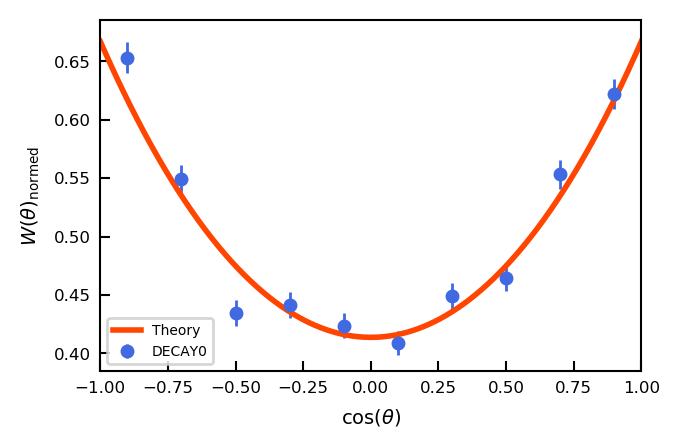

In [233]:
#Function normalization
stepsize=0.001
costet=np.arange(-1,1.01,stepsize)
w=wtheta(0.3381,0.0054,costet)
areaw=np.sum(w*stepsize)

#Histogram normalization
nbins=10
binwidth=2/nbins
counts, edges = np.histogram(angles23,bins=nbins,range=(-1,1))
centers=edges[:-1]+binwidth/2
norm=np.sum(np.multiply(counts,binwidth))
normed_counts=np.divide(counts,norm)
normed_counts_err=np.divide(np.sqrt(counts),norm)

plt.errorbar(centers,normed_counts,normed_counts_err, color='royalblue', marker='o', linestyle='', 
             ms=4, elinewidth=1, label='DECAY0')
plt.plot(costet,w/areaw, linestyle='-', marker='', linewidth=2, color='orangered', label='Theory')
plt.xlabel('cos($\\theta$)')
plt.ylabel('$W(\\theta)_{\\rm{normed}}$')
plt.xlim(-1,1)
plt.legend()
plt.show()

#### 3.2.2 The 2+ $\rightarrow$ 2+ $\rightarrow$ 0+ transition with $E_2 = 1437$ keV, $E_3 = 603$ keV  and $\delta_{2+\rightarrow2+} = 0.13$

In [234]:
angles24=iterate_df_angles(dataframe=df0220,ngammas=3,igamma1=2,igamma2=3,egreater=0.724,esmaller=np.inf)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


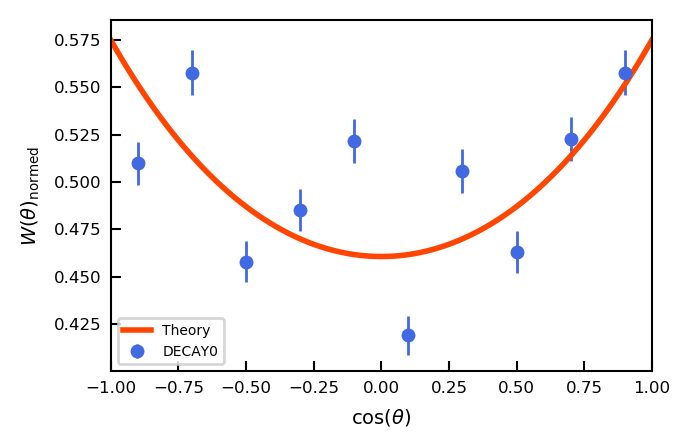

In [235]:
#Function normalization
stepsize=0.001
costet=np.arange(-1,1.01,stepsize)
w=wtheta(0.1510,0.0054,costet)
areaw=np.sum(w*stepsize)

#Histogram normalization
nbins=10
binwidth=2/nbins
counts, edges = np.histogram(angles24,bins=nbins,range=(-1,1))
centers=edges[:-1]+binwidth/2
norm=np.sum(np.multiply(counts,binwidth))
normed_counts=np.divide(counts,norm)
normed_counts_err=np.divide(np.sqrt(counts),norm)

plt.errorbar(centers,normed_counts,normed_counts_err, color='royalblue', marker='o', linestyle='', 
             ms=4, elinewidth=1, label='DECAY0')
plt.plot(costet,w/areaw, linestyle='-', marker='', linewidth=2, color='orangered', label='Theory')
plt.xlabel('cos($\\theta$)')
plt.ylabel('$W(\\theta)_{\\rm{normed}}$')
plt.xlim(-1,1)
plt.legend()
plt.show()